## ClarID-Tools
<em>ClarID: A Human-Readable and Compact Identifier Specification for Biomedical Metadata Integration</em>


# Installation

*Note:* We'll perform an installation directly from the [GitHub](https://github.com/CNAG-Biomedical-Informatics/pheno-ranker) source.

First we will download the repository by using `git clone`

In [1]:
!git clone https://github.com/CNAG-Biomedical-Informatics/clarid-tools.git


Cloning into 'clarid-tools'...
remote: Enumerating objects: 331, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 331 (delta 45), reused 176 (delta 34), pack-reused 130 (from 2)
Receiving objects: 100% (331/331), 56.37 MiB | 16.22 MiB/s, done.
Resolving deltas: 100% (56/56), done.


Now we enter into `clarid-tools` directory:

In [2]:
%cd clarid-tools//

/content/clarid-tools


And we perform the installation of the needed dependencies.
Note that this task will take **a few minutes** to complete...

In [3]:
!make -f makefile.install install

sudo apt-get update
Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,790 kB]
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,961 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,238 kB]
Hit:11 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:13 http://archive.ubuntu.com/ubuntu jam

Let's make sure all works as it should:

In [4]:
!make -f makefile.install test

prove -l
t/bulk.t ...... ok
t/code.t ...... ok
t/qrcode.t .... ok
t/validate.t .. ok
All tests successful.
Files=4, Tests=52, 21 wallclock secs ( 0.05 usr  0.04 sys + 17.72 cusr  2.39 csys = 20.20 CPU)
Result: PASS


The CLI is located at `bin/clarid-tools`. Let's execute it to visualize the help:

In [4]:
 !bin/clarid-tools help code

USAGE: clarid-tools [-h] [long options ...]

    --action: String
        encode | decode

    --age_group: String
        age_group

    --assay: String
        assay key

    --batch: String
        batch

    --clar_id: String
        ID to decode (use --clar_id or --stub_id)

    --codebook: String
        path to codebook.yaml

    --condition: String
        comma-separated ICD-10 codes (e.g. C22.0,C18.1)

    --duration: String
        duration: P<digits><D|W|M|Y> or P0N (Not Available)

    --entity: String
        biosample | subject (accepts synonyms: biospecimen -> biosample;
        individual -> subject)

    --format: String
        human | stub

    --icd10_map: String
        path to ICD-10 map JSON

    --icd10_order: String
        path to icd10_order.json

    --infile: String
        bulk input CSV/TSV

    --max_conditions: Int
        maximum number of ICD-10 codes allowed

    --outfile: String
        bulk output file

    --project: String
        project key



# Quickstart

Ok, we're going to run a few jobs. We'll be using the included test data.

## `code` subcommand

Let's start encoding and decoding right away!

### Biosample

#### Human Format

In [5]:
# Encode one biosample with the CLI
!bin/clarid-tools code \
  --entity biosample \
  --format human \
  --action encode \
  --codebook share/clarid-codebook.yaml \
  --project TCGA-AML \
  --species Human \
  --subject_id 42 \
  --tissue Liver \
  --sample_type Tumor \
  --assay RNA_seq \
  --condition C15.3 \
  --timepoint Treatment \
  --duration P1M \
  --batch 1 \
  --replicate 5

TCGA_AML-HomSap-00042-LIV-TUM-RNA-C15.3-TRT-P1M-B01-R05


In [6]:
# Decode one biosample with the CLI
!bin/clarid-tools code \
  --entity biosample \
  --format human \
  --action decode \
  --codebook share/clarid-codebook.yaml \
  --clar_id TCGA_AML-HomSap-00042-LIV-TUM-RNA-C15.3-TRT-P1M-B01-R05

project: TCGA-AML
species: Human
subject_id: 42
tissue: Liver
sample_type: Tumor
assay: RNA_seq
condition: C15.3
timepoint: Treatment
duration: P1M
batch: 1
replicate: 5


In [7]:
# Decode one biosample with the CLI + translating condition
!bin/clarid-tools code \
  --entity biosample \
  --format human \
  --action decode \
  --codebook share/clarid-codebook.yaml \
  --clar_id TCGA_AML-HomSap-00042-LIV-TUM-RNA-C15.3-TRT-P1M-B01-R05 \
  --with_condition_name


project: TCGA-AML
species: Human
subject_id: 42
tissue: Liver
sample_type: Tumor
assay: RNA_seq
condition: C15.3
timepoint: Treatment
duration: P1M
batch: 1
replicate: 5
condition_name: Malignant neoplasm of upper third of esophagus


In [8]:
# Bulk encode from CSV
!bin/clarid-tools code \
  --entity biosample \
  --format human \
  --action encode \
  --codebook share/clarid-codebook.yaml \
  --infile ex/biosample.csv \
  --sep ","

unique_id,subject_id,project,species,tissue,sample_type,assay,condition,timepoint,duration,batch,replicate,clar_id
samp001,1,CNAG-Test,Human,Liver,Normal,RNA_seq,C22.0,Baseline,P0D,1,5,CNAG_Test-HomSap-00001-LIV-NOR-RNA-C22.0-BSL-P0D-B01-R05
samp002,2,CNAG-Test,Mouse,Brain,Tumor,ChIP_seq,C71.0,Treatment,P7W,2,2,CNAG_Test-MusMus-00002-BRN-TUM-CHI-C71.0-TRT-P7W-B02-R02
samp003,3,CNAG-Test,Zebrafish,Blood,Normal,WES,I46,Surgery,P1M,3,1,CNAG_Test-DanRer-00003-BLO-NOR-WES-I46-SUR-P1M-B03-R01
samp004,4,CNAG-Test,Rat,Kidney,Normal,LC_MS,C66,Challenge,P3Y,1,10,CNAG_Test-RatNor-00004-KID-NOR-LCMS-C66-CHL-P3Y-B01-R10


In [9]:
# Bulk decode from CSV
!bin/clarid-tools code \
  --entity biosample \
  --format human \
  --action decode \
  --codebook share/clarid-codebook.yaml \
  --infile ex/biosample_to_decode.csv \
  --sep ","

unique_id,clar_id,project,species,subject_id,tissue,sample_type,assay,condition,timepoint,duration,batch,replicate
samp001,CNAG_Test-HomSap-00001-LIV-NOR-RNA-C22.0-BSL-P0D-B01-R05,CNAG-Test,Human,1,Liver,Normal,RNA_seq,C22.0,Baseline,P0D,1,5
samp002,CNAG_Test-MusMus-00002-BRN-TUM-CHI-C71.0-TRT-P7W-B02-R02,CNAG-Test,Mouse,2,Brain,Tumor,ChIP_seq,C71.0,Treatment,P7W,2,2
samp003,CNAG_Test-DanRer-00003-BLO-NOR-WES-I46-SUR-P1M-B03-R01,CNAG-Test,Zebrafish,3,Blood,Normal,WES,I46,Surgery,P1M,3,1
samp004,CNAG_Test-RatNor-00004-KID-NOR-LCMS-C66-CHL-P3Y-B01-R10,CNAG-Test,Rat,4,Kidney,Normal,LC_MS,C66,Challenge,P3Y,1,10


#### Stub Format

In [10]:
# Encode one biosample with the CLI
!bin/clarid-tools code \
  --entity biosample \
  --format stub \
  --action encode \
  --codebook share/clarid-codebook.yaml \
  --project TCGA-AML \
  --species Human \
  --subject_id 42 \
  --tissue Liver \
  --sample_type Tumor \
  --assay RNA_seq \
  --condition C15.3 \
  --timepoint Treatment \
  --duration P1M \
  --batch 1 \
  --replicate 5

AML0100gLTR0MP01T1MB01R05


In [11]:
# Decode one biosample with the CLI
!bin/clarid-tools code \
  --entity biosample \
  --format stub \
  --action decode \
  --codebook share/clarid-codebook.yaml \
  --stub_id AML0100gLTR0MP01T1MB01R05

project: TCGA-AML
species: Human
subject_id: 42
tissue: Liver
sample_type: Tumor
assay: RNA_seq
condition: C15.3
timepoint: Treatment
duration: P1M
batch: 1
replicate: 5


### Subject

#### Human Format

In [12]:
# Bulk encode
!bin/clarid-tools code \
  --entity subject \
  --format human \
  --action encode \
  --codebook share/clarid-codebook.yaml \
  --infile ex/subject.csv \
   --sep ","

unique_id,study,subject_id,type,condition,sex,age_group,clar_id
patient_001,COPDStudy,1001,Case,J44.9,Male,Age40to49,COPDStudy-01001-Case-J44.9-Male-A40_49
patient_002,AsthmaCohort,1002,Control,J98.51,Female,Age50to59,AsthmaCohort-01002-Control-J98.51-Female-A50_59
patient_003,COPDStudy,1003,Control,J44.9,Female,Age50to59,COPDStudy-01003-Control-J44.9-Female-A50_59
patient_004,AsthmaCohort,1004,Case,J98.51,Male,Age40to49,AsthmaCohort-01004-Case-J98.51-Male-A40_49


In [15]:
# Bulk decode
!bin/clarid-tools code \
    --entity subject \
    --format human \
    --action decode \
    --codebook share/clarid-codebook.yaml \
    --infile ex/subject_to_decode_human.csv \
    --sep ","

unique_id,clar_id,study,subject_id,type,condition,sex,age_group
patient_001,COPDStudy-01001-Case-J44.9-Male-A40_49,COPDStudy,1001,Case,J44.9,Male,Age40to49
patient_002,AsthmaCohort-01002-Control-J98.51-Female-A50_59,AsthmaCohort,1002,Control,J98.51,Female,Age50to59
patient_003,COPDStudy-01003-Control-J44.9-Female-A50_59,COPDStudy,1003,Control,J44.9,Female,Age50to59
patient_004,AsthmaCohort-01004-Case-J98.51-Male-A40_49,AsthmaCohort,1004,Case,J98.51,Male,Age40to49


#### Stub Format

In [16]:
# Bulk encode
!bin/clarid-tools code \
      --entity subject \
      --format stub \
      --action encode \
      --codebook share/clarid-codebook.yaml \
      --infile ex/subject.csv \
      --sep ","

unique_id,study,subject_id,type,condition,sex,age_group,stub_id
patient_001,COPDStudy,1001,Case,J44.9,Male,Age40to49,COPDStudy0G9C3Of01MA4
patient_002,AsthmaCohort,1002,Control,J98.51,Female,Age50to59,AsthmaCohort0GAN3SM01FA5
patient_003,COPDStudy,1003,Control,J44.9,Female,Age50to59,COPDStudy0GBN3Of01FA5
patient_004,AsthmaCohort,1004,Case,J98.51,Male,Age40to49,AsthmaCohort0GCC3SM01MA4


In [18]:
# Bulk decode
!bin/clarid-tools code \
      --entity subject \
      --format stub \
      --action decode \
      --codebook share/clarid-codebook.yaml \
      --infile ex/subject_to_decode_stub.csv \
      --sep ","

unique_id,stub_id,study,subject_id,type,condition,sex,age_group
patient_001,COPDStudy0G9C3Of01MA4,COPDStudy,1001,Case,J44.9,Male,Age40to49
patient_002,AsthmaCohort0GAN3SM01FA5,AsthmaCohort,1002,Control,J98.51,Female,Age50to59
patient_003,COPDStudy0GBN3Of01FA5,COPDStudy,1003,Control,J44.9,Female,Age50to59
patient_004,AsthmaCohort0GCC3SM01MA4,AsthmaCohort,1004,Case,J98.51,Male,Age40to49


## `qrcode`subcommand

First we will create a directory to write the PNGs (default is `qrcodes/`):


In [19]:
!mkdir /content/qr_codes/

Now let's encode to QR:

In [20]:
# Bulk encode to QR
!bin/clarid-tools qrcode \--action encode \
       --input ex/biosample_to_decode.csv \
       --outdir /content/qrcodes_dir \
       --size 10

Subroutine options_usage redefined at /content/clarid-tools/bin/../lib/ClarID/Tools/Command/qrcode.pm line 79.
Encoding column 'clar_id' into PNG files in directory '/content/qrcodes_dir'
  - CNAG_Test-HomSap-00001-LIV-NOR-RNA-C22.0-BSL-P0D-B01-R05 -> /content/qrcodes_dir/CNAG_Test-HomSap-00001-LIV-NOR-RNA-C22_0-BSL-P0D-B01-R05.png
  - CNAG_Test-MusMus-00002-BRN-TUM-CHI-C71.0-TRT-P7W-B02-R02 -> /content/qrcodes_dir/CNAG_Test-MusMus-00002-BRN-TUM-CHI-C71_0-TRT-P7W-B02-R02.png
  - CNAG_Test-DanRer-00003-BLO-NOR-WES-I46-SUR-P1M-B03-R01 -> /content/qrcodes_dir/CNAG_Test-DanRer-00003-BLO-NOR-WES-I46-SUR-P1M-B03-R01.png
  - CNAG_Test-RatNor-00004-KID-NOR-LCMS-C66-CHL-P3Y-B01-R10 -> /content/qrcodes_dir/CNAG_Test-RatNor-00004-KID-NOR-LCMS-C66-CHL-P3Y-B01-R10.png


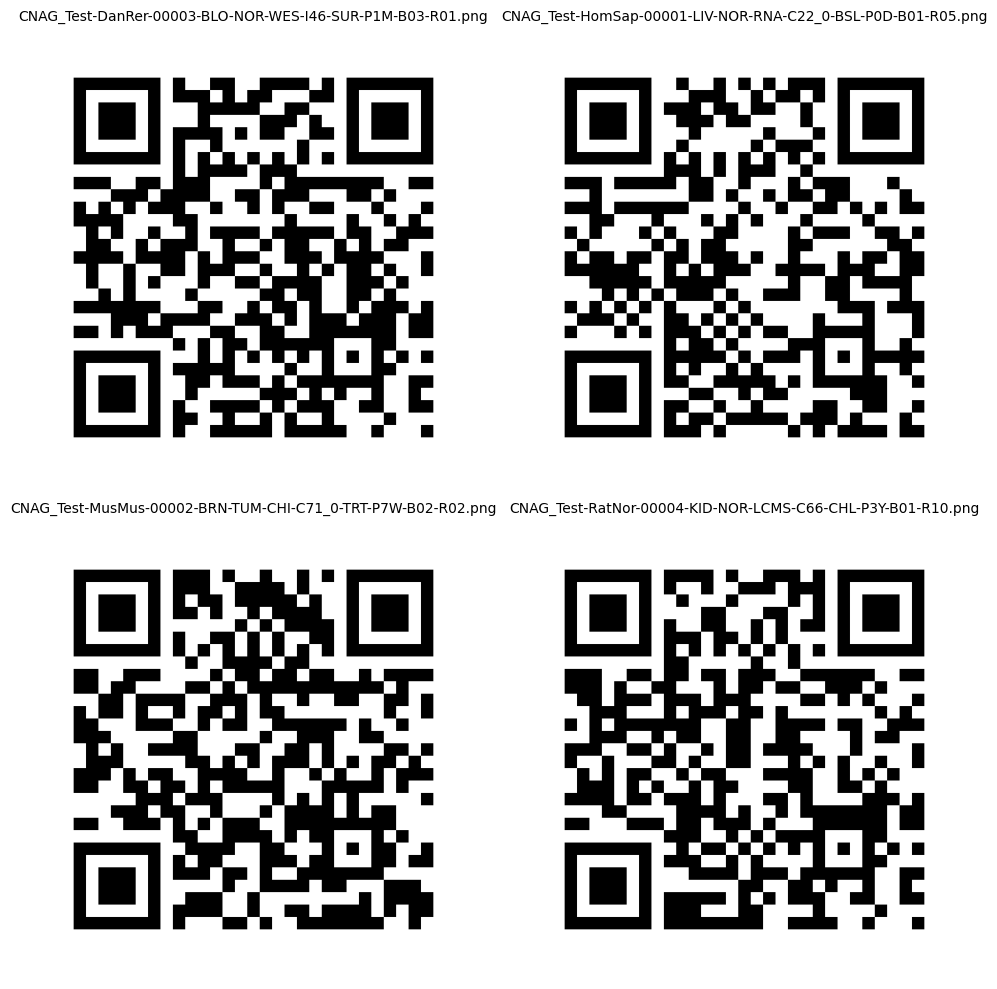

In [21]:
# @title Display QR images
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your directory containing PNGs
img_dir = '/content/qrcodes_dir'  # Replace with your actual path

# Get all PNG files in the directory, sorted for consistency
png_files = sorted([f for f in os.listdir(img_dir) if f.lower().endswith('.png')])

# Load up to the first 4 images and their filenames
images = [(mpimg.imread(os.path.join(img_dir, f)), f) for f in png_files[:4]]

# Create 2x2 grid for up to 4 images
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i in range(4):
    if i < len(images):
        img, filename = images[i]
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(filename, fontsize=10)
    else:
        axes[i].axis('off')  # Hide empty plots

plt.tight_layout()
plt.show()

Now let's decode teh QRs to ClarID.

In [22]:
# Bulk decode from QR
!bin/clarid-tools qrcode \
       --action decode \
       --input /content/qrcodes_dir \
       --outfile /content/file.csv \
       --column clar_id

Subroutine options_usage redefined at /content/clarid-tools/bin/../lib/ClarID/Tools/Command/qrcode.pm line 79.
Decoded CSV written to '/content/file.csv'


Let's visualize the contents:

In [ ]:
# @title See table
import pandas as pd

# Replace with the path to your CSV file
csv_path = '/content/file.csv'

# Read the CSV into a DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows
df.head()

,clar_id
0,CNAG_Test-DanRer-00003-BLO-NOR-WES-I46-SUR-P1M...
1,CNAG_Test-HomSap-00001-LIV-NOR-RNA-C22.0-BSL-P...
2,CNAG_Test-RatNor-00004-KID-NOR-LCMS-C66-CHL-P3...
3,CNAG_Test-MusMus-00002-BRN-TUM-CHI-C71.0-TRT-P...


## `validate` subcommand

This subcommand serves to validate a user's created **codebook**.


In [23]:
# Validate codebook
!bin/clarid-tools validate \
       --codebook share/clarid-codebook.yaml


✅ Codebook is valid


# Use *Cases*

## Use Case I: Subject-Level Encoding of GDC Data Cases

See full text at the [documentation]().

Now we proceed with the data extraction:

In [24]:

!nb/data/scripts/csv2_clarid_in.py \
    --entity subject \
    -i nb/data/subject/clinical.tsv.gz \
    -o /content/clinical_in.csv.gz \
    --mapping nb/data/subject/mapping_subject.yaml


Wrote /content/clinical_in.csv.gz (113760 records)


Let's visualize the table with pandas.

In [ ]:
# @title Display CSV
import pandas as pd

# Replace with the path to your CSV file
csv_path = '/content/clinical_in.csv.gz'

# Read the CSV into a DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows
df.head(10)

In [25]:
# ClarID encoding Human-format
!bin/clarid-tools code \
    --entity subject \
    --format human \
    --action encode \
    --infile /content/clinical_in.csv.gz \
    --sep "," \
    --outfile /content/clarid_human.csv.gz

Let's display the created CSV:

In [29]:
# @title Display CSV
import pandas as pd

# Replace with the path to your CSV file
csv_path = '/content/clarid_human.csv.gz'

# Read the CSV into a DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows
df.head(10)

,unique_id,study,type,condition,sex,age_group,subject_id,clar_id
0,00016c8f-a0be-4319-9c42-4f3bcd90ac92,FM-AD,Case,R69,Female,Not Available,1,FM_AD-00001-Case-R69-Female-NAV
1,00048fa6-4318-42ef-9709-7dedb0d938b3,FM-AD,Case,R69,Male,Not Available,2,FM_AD-00002-Case-R69-Male-NAV
2,0004d251-3f70-4395-b175-c94c2f5b1b81,TCGA-LIHC,Case,C22.0,Male,Age40to49,3,TCGA_LIHC-00003-Case-C22.0-Male-A40_49
3,0004d251-3f70-4395-b175-c94c2f5b1b81,TCGA-LIHC,Case,C22.0,Male,Age40to49,3,TCGA_LIHC-00003-Case-C22.0-Male-A40_49
4,0004d251-3f70-4395-b175-c94c2f5b1b81,TCGA-LIHC,Case,C22.0,Male,Age40to49,3,TCGA_LIHC-00003-Case-C22.0-Male-A40_49
5,0004d251-3f70-4395-b175-c94c2f5b1b81,TCGA-LIHC,Case,C22.0,Male,Age40to49,3,TCGA_LIHC-00003-Case-C22.0-Male-A40_49
6,0004d251-3f70-4395-b175-c94c2f5b1b81,TCGA-LIHC,Case,R69,Male,Age40to49,3,TCGA_LIHC-00003-Case-R69-Male-A40_49
7,0004d251-3f70-4395-b175-c94c2f5b1b81,TCGA-LIHC,Case,R69,Male,Age40to49,3,TCGA_LIHC-00003-Case-R69-Male-A40_49
8,0004d251-3f70-4395-b175-c94c2f5b1b81,TCGA-LIHC,Case,R69,Male,Age40to49,3,TCGA_LIHC-00003-Case-R69-Male-A40_49
9,0004d251-3f70-4395-b175-c94c2f5b1b81,TCGA-LIHC,Case,R69,Male,Age40to49,3,TCGA_LIHC-00003-Case-R69-Male-A40_49


## Use Case II: Biosample-Level Encoding of GDC Data


### Data Pre-processing

In [30]:
!nb/data/scripts/csv2_clarid_in.py \
    --entity biosample \
    -i nb/data/biosample/sample.tsv.gz \
    -o /content/sample_in.csv.gz \
    --mapping nb/data/biosample/mapping_biosample.yaml

Wrote /content/sample_in.csv.gz (4255 records)


Now the conversion:

In [31]:
!bin/clarid-tools code \
    --entity biosample \
    --format human \
    --action encode \
    --infile /content/sample_in.csv.gz \
    --sep "," \
    --outfile /content/clarid_human.csv.gz


Let's display the content

In [32]:
# @title Display CSV
import pandas as pd

# Replace with the path to your CSV file
csv_path = '/content/clarid_human.csv.gz'

# Read the CSV into a DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows
df.head(10)

,unique_id,project,species,tissue,sample_type,assay,condition,timepoint,duration,subject_id,clar_id
0,56c31503-fbd0-4a19-bf75-4cd0dd7dbe9e,TARGET-AML,Human,BoneMarrow,Primary,Not Available,Z00.00,Collection,P0N,1,TARGET_AML-HomSap-00001-BMR-PRI-NAV-Z00.00-COL...
1,7f34787f-31eb-4a3c-8cfd-5d2a3bb1a736,TARGET-AML,Human,BoneMarrow,Recurrence,Not Available,C92.0,Collection,P0N,1,TARGET_AML-HomSap-00001-BMR-REC-NAV-C92.0-COL-P0N
2,38f80134-2b88-587c-9795-d9165c5994eb,TARGET-AML,Human,BoneMarrow,Primary,Not Available,C92.0,Collection,P0N,2,TARGET_AML-HomSap-00002-BMR-PRI-NAV-C92.0-COL-P0N
3,f09af1e3-ce41-5278-8ed7-7a9e90c7beb8,TARGET-AML,Human,BoneMarrow,Normal,Not Available,C92.0,Collection,P0N,2,TARGET_AML-HomSap-00002-BMR-NOR-NAV-C92.0-COL-P0N
4,15017774-e3f6-5ae4-940f-21f0d1fec965,TARGET-AML,Human,BoneMarrow,Normal,Not Available,C92.0,Collection,P0N,3,TARGET_AML-HomSap-00003-BMR-NOR-NAV-C92.0-COL-P0N
5,31bb2050-5072-5de4-9241-82e33d06bb5e,TARGET-AML,Human,BoneMarrow,Primary,Not Available,C92.0,Collection,P0N,3,TARGET_AML-HomSap-00003-BMR-PRI-NAV-C92.0-COL-P0N
6,8b7ca963-f066-4062-8c79-88b03ddf2541,TARGET-AML,Human,BoneMarrow,Primary,Not Available,Z00.00,Collection,P0N,4,TARGET_AML-HomSap-00004-BMR-PRI-NAV-Z00.00-COL...
7,a8297994-a778-44a2-b350-51e6a35db302,TARGET-AML,Human,BoneMarrow,Normal,Not Available,Z00.00,Collection,P0N,5,TARGET_AML-HomSap-00005-BMR-NOR-NAV-Z00.00-COL...
8,5001321c-e364-4ec1-a6c4-662bbdfed9b6,TARGET-AML,Human,PeripheralBlood,Primary,Not Available,Z00.00,Collection,P0N,6,TARGET_AML-HomSap-00006-PBLO-PRI-NAV-Z00.00-CO...
9,8dfaec48-8d49-4466-bf09-2ded6b1d120a,TARGET-AML,Human,BoneMarrow,Normal,Not Available,Z00.00,Collection,P0N,6,TARGET_AML-HomSap-00006-BMR-NOR-NAV-Z00.00-COL...


# Addendum: Uploading files

It's possible to run jobs using your own files. A few notes:

* The files will be stored in **your instance** of this document. We (developers) don't have access to them.

* Uploaded files will get **deleted** when this runtime is recycled.

* `ClarID-Tools` does not send remote information to our servers and does not store user's information.

* The security is dictated by your Google account / drive.

The files can be uploaded by clicking in the upload button on the left tab of this screen. Files will be uploaded to `/content`.

Once the file is uploaded, you can execute `clarid-tools` command-line as we did above.